In [1]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt

import utilitis_FEEC.Bspline as bspline
import utilitis_FEEC.bsplines as bsp
import utilitis_FEEC.derivatives as der

In [2]:
# ... define boundary conditions in each direction (True: periodic, False: else)
bc = [False, True]
bc_1, bc_2 = bc


# ... number of elements and element boundaries in each direction
Nel_1 = 5
Nel_2 = 5

el_b_1 = np.linspace(0., 1., Nel_1 + 1)
el_b_2 = np.linspace(0., 1., Nel_2 + 1)

d1 = 1./Nel_1
d2 = 1./Nel_2

# ... degree of spline basis (of the 0-forms) in each direction
p = [3, 3]
p1, p2 = p


# ... number of basis functions (for outer region in angular direction)
Nbase = [Nel_1 + p1, Nel_2 + p2] 
Nbase_1, Nbase_2 = Nbase


# ... knot vectors for compatible spline spaces
T1 = bsp.make_knots(el_b_1, p1, bc_1)
T2 = bsp.make_knots(el_b_2, p2, bc_2)

T2_prod = np.repeat(T2, 4)[9:-9]


# ... greville points for interpolation of analytical mapping
greville_1 = bsp.greville(T1, p1, bc_1)
greville_2 = bsp.greville(T2, p2, bc_2)


# discrete gradient matrices
grad_1 = der.GRAD_1d(p1, Nbase_1, None)
grad_2 = der.GRAD_1d(p2, Nbase_2, True)

q1plot = np.linspace(0., 1., 500)
q2plot = np.linspace(0., 1., 500)

In [3]:
t, dt = sy.symbols('t, dt')

knots = (np.arange(Nel_2 + 1 + 2*p2) - p2)*dt
knots_prod = np.repeat(knots, 4)[9:-9]

In [4]:
N2 = [[[]], [[], []], [[], [], []], [[], [], [], []]]

# initialization
for i in range(len(knots) - 1):
    N2[0][0].append(1)

# recursion
for i in range(1, p2 + 1):
    
    pk = i
    
    for j in range(len(knots) - pk - 1):
        for k in range(pk + 1):

            if k == 0:

                N2[i][k].append(sy.expand((t - knots[j])/(knots[j + pk] - knots[j])*N2[i - 1][k][j] + (knots[j + pk + 1] - t)/(knots[j + pk + 1] - knots[j + 1])*0))

            elif k == pk:

                N2[i][k].append(sy.expand((t - knots[j])/(knots[j + pk] - knots[j])*0 + (knots[j + pk + 1] - t)/(knots[j + pk + 1] - knots[j + 1])*N2[i - 1][k - 1][j + 1]))
                
            else:
                
                N2[i][k].append(sy.expand((t - knots[j])/(knots[j + pk] - knots[j])*N2[i - 1][k][j] + (knots[j + pk + 1] - t)/(knots[j + pk + 1] - knots[j + 1])*N2[i - 1][k - 1][j + 1]))

In [5]:
N2_prod = [[[]], [[], []], [[], [], []], [[], [], [], []], [[], [], [], [], []], [[], [], [], [], [], []], [[], [], [], [], [], [], []]]

# initialization
for i in range(len(knots_prod) - 1):
    N2_prod[0][0].append(1)

# recursion
for i in range(1, 2*p2 + 1):
    
    pk = i
    
    for j in range(len(knots_prod) - pk - 1):
        for k in range(pk + 1):

            if k == 0:
                
                den = knots_prod[j + pk] - knots_prod[j]
                
                if den == 0:
                    
                    N2_prod[i][k].append(0)
                    
                else:

                    N2_prod[i][k].append(sy.expand((t - knots_prod[j])/den*N2_prod[i - 1][k][j]))

            elif k == pk:
                
                den = knots_prod[j + pk + 1] - knots_prod[j + 1]
                
                if den == 0:
                    
                    N2_prod[i][k].append(0)
                    
                else:

                    N2_prod[i][k].append(sy.expand((knots_prod[j + pk + 1] - t)/(knots_prod[j + pk + 1] - knots_prod[j + 1])*N2_prod[i - 1][k - 1][j + 1]))
                
            else:
                
                den1 = knots_prod[j + pk] - knots_prod[j]
                den2 = knots_prod[j + pk + 1] - knots_prod[j + 1]
                
                if den1 == 0 and den2 != 0:
                
                    N2_prod[i][k].append(sy.expand((knots_prod[j + pk + 1] - t)/den2*N2_prod[i - 1][k - 1][j + 1]))
                    
                elif den1 != 0 and den2 == 0:
                    
                    N2_prod[i][k].append(sy.expand((t - knots_prod[j])/den1*N2_prod[i - 1][k][j]))
                    
                elif den1 == 0 and den2 == 0:
                    
                    N2_prod[i][k].append(0)
                    
                else:
                    
                    N2_prod[i][k].append(sy.expand((t - knots_prod[j])/den1*N2_prod[i - 1][k][j] + (knots_prod[j + pk + 1] - t)/den2*N2_prod[i - 1][k - 1][j + 1]))

In [6]:
sy.expand(N2[3][0][3]*N2[3][0][3])

t**6/(36*dt**6)

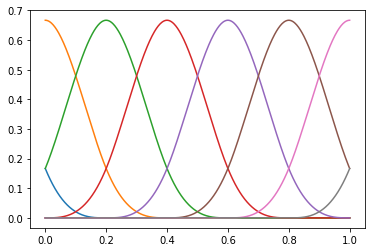

In [7]:
NN2 = bspline.Bspline(T2, p2)

for i in range(NN2.N):
    plt.plot(q2plot, NN2(q2plot, i))

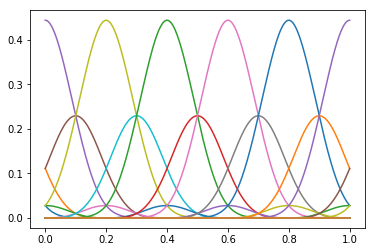

In [8]:
for i in range(NN2.N):
    for j in range(p2 + 1):
        plt.plot(q2plot, NN2(q2plot, i)*NN2(q2plot, i + j))
        
#plt.ylim((0, 0.1))

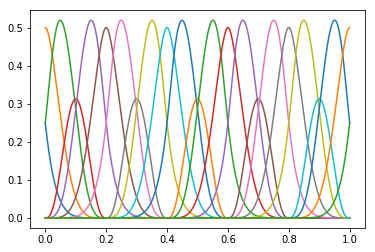

In [9]:
NN2_prod = bspline.Bspline(T2_prod, 2*p2)

for i in range(NN2_prod.N):
    plt.plot(q2plot, NN2_prod(q2plot, i))

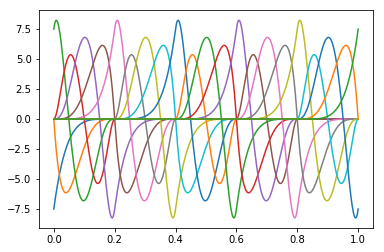

In [10]:
NN2_prod = bspline.Bspline(T2_prod, 2*p2)

for i in range(NN2_prod.N):
    plt.plot(q2plot, NN2_prod(q2plot, i, 1))

In [26]:
value = 0.
co = np.random.rand(NN2_prod.N - 3)

for i in range(NN2_prod.N):
    value += NN2_prod(0.18, i, 1)*co[i%20]

In [27]:
value

1.487500113883819

In [10]:
trans = np.array([[1/4, 1/2, 1/4, 0., 0., 0., 0.], [-3/2, 0., 3/2, 0., 0., 0., 0.], [15/4, -15/2, 15/4, 0., 0., 0., 0.], [-5., 20., -35., 20., 0., 0., 0.], [15/4, -45/2, 255/4, -60., 15., 0., 0.], [-3/2, 12., -93/2, 60., -27., 3., 0.], [1/4, -5/2, 49/4, -20., 49/4, -5/2, 1/4]])

rhs = np.array([[1/6, 2/3, 1/6, 0.], [-1/2, 0., 1/2, 0.], [1/2, -1., 1/2, 0.], [-1/6, 1/2, -1/2, 1/6], [0., 0., 0., 0.], [0., 0., 0., 0.], [0., 0., 0., 0.]])

In [11]:
res = np.linalg.solve(trans, rhs)

In [12]:
res

array([[ 3.66666667e-01,  6.00000000e-01,  3.33333333e-02,
         1.85037171e-17],
       [ 1.33333333e-01,  7.33333333e-01,  1.33333333e-01,
         3.70074342e-18],
       [ 3.33333333e-02,  6.00000000e-01,  3.66666667e-01,
        -9.25185854e-18],
       [ 8.33333333e-03,  4.91666667e-01,  4.91666667e-01,
         8.33333333e-03],
       [ 3.97829917e-17,  3.66666667e-01,  6.00000000e-01,
         3.33333333e-02],
       [ 1.36002321e-16,  1.33333333e-01,  7.33333333e-01,
         1.33333333e-01],
       [ 7.98435392e-16,  3.33333333e-02,  6.00000000e-01,
         3.66666667e-01]])

In [13]:
test = np.zeros((20, 5))

In [14]:
for ie in range(Nel_2):

    for il in range(7):
        for jl in range(4):
        
            i = ie*4 + il
            j = ie*1 + jl

            test[i%20, j%5] = res[il, jl]

In [15]:
coeff_old = np.random.rand(5)

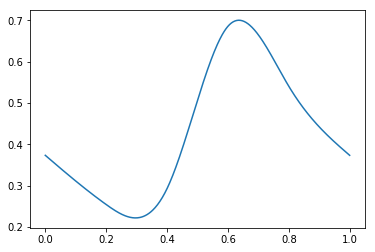

In [16]:
old = np.zeros(len(q2plot))

for i in range(NN2.N):
    old += coeff_old[i%Nel_2]*NN2(q2plot, i)
    
plt.plot(q2plot, old)

In [17]:
coeff_new = test.dot(coeff_old)

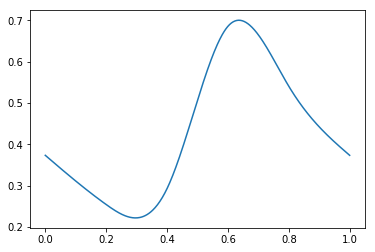

In [18]:
new = np.zeros(len(q2plot))

for i in range(NN2_prod.N):
    new += coeff_new[i%20]*NN2_prod(q2plot, i)
    
plt.plot(q2plot, new)

In [41]:
rhs2 = np.array([[1/36, 1/9, 1/36, 0., 4/9, 1/9, 0., 1/36, 0., 0.],
                  [-1/6, -1/3, 0., 0., 0., 1/3, 0., 1/6, 0., 0.],
                  [5/12, 1/6, -1/12, 0., -4/3, 1/6, 0., 5/12, 0., 0.],
                  [-5/9, 17/36, -1/9, 1/36, 2/3, -3/4, 1/9, 1/3, 1/36, 0.],
                  [5/12, -3/4, 5/12, -1/12, 1., -1/4, 0., -1/4, 1/12, 0.],
                  [-1/6, 5/12, -1/3, 1/12, -1., 3/4, -1/6, -1/2, 1/12, 0.],
                  [1/36, -1/12, 1/12, -1/36, 1/4, -1/4, 1/12, 1/4, -1/12, 1/36]])

In [42]:
res2 = np.linalg.solve(trans, rhs2)

In [43]:
res2.shape

(7, 10)

In [180]:
test = np.zeros((20, 20))

ind1 = np.arange(10)
ind2 = np.array([-1, -1, -1, -1, 0, 1, 2, 4, 5, 7])
ind3 = np.array([3, 6, 8, 9])

test[:7, :10] = res2

In [159]:
test[4:11, 4:14]

array([[ 1.11111111e-01,  2.33333333e-01,  2.22222222e-02,
         3.55555556e-01,  1.11111111e-02,  4.14483263e-16,
         3.39234813e-18,  1.44945784e-17,  1.48029737e-17,
        -0.00000000e+00],
       [-5.78241159e-18,  1.00000000e-01,  3.33333333e-02,
         5.33333333e-01,  1.00000000e-01,  2.36847579e-16,
         1.85037171e-18,  6.47630098e-18,  9.71445147e-18,
         0.00000000e+00],
       [ 3.46944695e-18,  1.11111111e-02,  2.22222222e-02,
         3.55555556e-01,  2.33333333e-01,  1.11111111e-01,
         7.70988212e-19, -1.54197642e-18,  4.62592927e-18,
        -0.00000000e+00],
       [ 8.09537622e-18,  1.38888889e-03,  5.55555556e-03,
         2.11111111e-01,  2.73611111e-01,  2.11111111e-01,
         1.38888889e-03,  5.55555556e-03,  1.38888889e-03,
        -0.00000000e+00],
       [ 1.04083409e-17,  3.51570624e-17,  1.08709338e-17,
         1.11111111e-01,  2.33333333e-01,  3.55555556e-01,
        -0.00000000e+00,  2.22222222e-02,  1.11111111e-02,
        -0.

In [209]:
test

array([[ 1.11111111e-01,  2.33333333e-01, -0.00000000e+00,
         2.22222222e-02,  1.11111111e-02, -0.00000000e+00,
         1.44945784e-17,  4.14483263e-16,  1.48029737e-17,
        -0.00000000e+00,  0.00000000e+00,  1.04083409e-17,
         0.00000000e+00,  3.51570624e-17,  1.11111111e-01,
         0.00000000e+00,  1.08709338e-17,  2.33333333e-01,
         3.55555556e-01,  0.00000000e+00],
       [-5.78241159e-18,  1.00000000e-01,  0.00000000e+00,
         3.33333333e-02,  1.00000000e-01,  0.00000000e+00,
         6.47630098e-18,  2.36847579e-16,  9.71445147e-18,
         0.00000000e+00,  0.00000000e+00,  1.04083409e-17,
         0.00000000e+00,  9.43689571e-17,  7.91033905e-16,
         0.00000000e+00,  7.00828284e-17,  1.00000000e-01,
         5.33333333e-01,  0.00000000e+00],
       [ 3.46944695e-18,  1.11111111e-02,  1.38777878e-17,
         2.22222222e-02,  2.33333333e-01,  1.11111111e-01,
        -1.54197642e-18,  1.11111111e-01,  4.62592927e-18,
        -0.00000000e+00,  0.0

In [217]:
res2[:, 3]

array([ 3.39234813e-18,  1.85037171e-18,  7.70988212e-19,  1.38888889e-03,
       -0.00000000e+00,  0.00000000e+00,  1.38777878e-17])

In [219]:
res2[:, 6]

array([ 1.44945784e-17,  6.47630098e-18, -1.54197642e-18,  5.55555556e-03,
        2.22222222e-02,  3.33333333e-02,  2.22222222e-02])

In [216]:
res2

array([[ 1.11111111e-01,  2.33333333e-01,  2.22222222e-02,
         3.39234813e-18,  3.55555556e-01,  1.11111111e-02,
         1.44945784e-17,  4.14483263e-16,  1.48029737e-17,
        -0.00000000e+00],
       [-5.78241159e-18,  1.00000000e-01,  3.33333333e-02,
         1.85037171e-18,  5.33333333e-01,  1.00000000e-01,
         6.47630098e-18,  2.36847579e-16,  9.71445147e-18,
         0.00000000e+00],
       [ 3.46944695e-18,  1.11111111e-02,  2.22222222e-02,
         7.70988212e-19,  3.55555556e-01,  2.33333333e-01,
        -1.54197642e-18,  1.11111111e-01,  4.62592927e-18,
        -0.00000000e+00],
       [ 8.09537622e-18,  1.38888889e-03,  5.55555556e-03,
         1.38888889e-03,  2.11111111e-01,  2.73611111e-01,
         5.55555556e-03,  2.11111111e-01,  1.38888889e-03,
        -0.00000000e+00],
       [ 1.04083409e-17,  3.51570624e-17,  1.08709338e-17,
        -0.00000000e+00,  1.11111111e-01,  2.33333333e-01,
         2.22222222e-02,  3.55555556e-01,  1.11111111e-02,
        -0.

In [200]:
order_old

array([0, 1, 4, 2, 5, 7, 3, 6, 8, 9])

In [202]:
start_loc

9

In [181]:
order_old = np.arange(10)
order_new = np.zeros(10, dtype=int)

start = 0
start_loc = 0



for ie in range(1, Nel_2):
    
    #for il in range(7):
        #i = (ie*4 + il)%20 
        
    counter1 = 0
    counter2 = 0

    start_loc = start

    for jl in range(10):

        if ind2[order_old[jl]] == -1:

            j = ((ie - 1)*4 + 10 + counter1)%20

            for il in range(7):
                i = (ie*4 + il)%20 
                test[i, j] = res2[il, ind3[counter1]]

            order_new[counter1 + 6] = ind3[counter1]

            counter1 += 1

            jj += 1

        else:

            j = (start_loc + jl)%20

            for il in range(7):
                i = (ie*4 + il)%20 
                test[i, j] = res2[il, ind2[order_old[jl]]]

            order_new[counter2] = ind2[order_old[jl]]

            counter2 += 1
            
            
            if counter2 == 1:
                start = j
                
    order_old = order_new

In [194]:
coeff_old = np.random.rand(5)

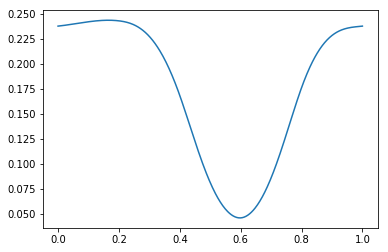

In [195]:
old = np.zeros(len(q2plot))

for i in range(NN2.N):
    for j in range(NN2.N):
        old += coeff_old[i%Nel_2]*coeff_old[j%Nel_2]*NN2(q2plot, i)*NN2(q2plot, j)
    
plt.plot(q2plot, old)

In [196]:
coeff_prod = np.zeros(20)

for i in range(Nel_2):
    for j in range(4):
        coeff_prod[4*i + j] = coeff_old[i]*coeff_old[(i + j)%Nel_2]

In [197]:
coeff_new = test.dot(coeff_prod)

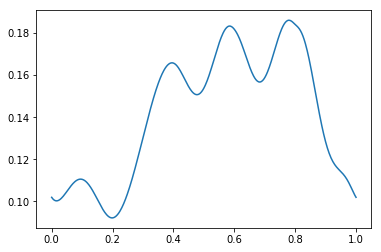

In [198]:
new = np.zeros(len(q2plot))

for i in range(NN2_prod.N):
    new += coeff_new[i%20]*NN2_prod(q2plot, i)
    
plt.plot(q2plot, new)

In [54]:
res2[:, 3]

array([ 3.39234813e-18,  1.85037171e-18,  7.70988212e-19,  1.38888889e-03,
       -0.00000000e+00,  0.00000000e+00,  1.38777878e-17])

In [53]:
res2[:, 8]

array([1.48029737e-17, 9.71445147e-18, 4.62592927e-18, 1.38888889e-03,
       1.11111111e-02, 1.00000000e-01, 2.33333333e-01])

In [38]:
res2[3]

array([ 8.09537622e-18,  1.38888889e-03,  5.55555556e-03,  2.11111111e-01,
        1.38888889e-03,  2.73611111e-01,  2.11111111e-01,  5.55555556e-03,
        1.38888889e-03, -0.00000000e+00])

In [515]:
fun = sy.lambdify((t, dt), N2[3])

F = fun(q2plot, d2)
coeff_old = np.random.rand(4)
coeff_old[1:4] = 0.
coeff_old[0] = 1.

In [516]:
coeff_old

array([1., 0., 0., 0.])

In [517]:
old = np.zeros(len(q2plot))

k = 0

for i in range(4):
    for j in range(4 - i):
        
        #old += coeff_old[i]*coeff_old[j + i]*F[3 - i][i]*F[3 - (j + i)][j + i]
        old += coeff_prod[k + j]*F[3 - i][i]*F[3 - (j + i)][j + i]
        
    k += (4 - i)

(0.0, 0.001)

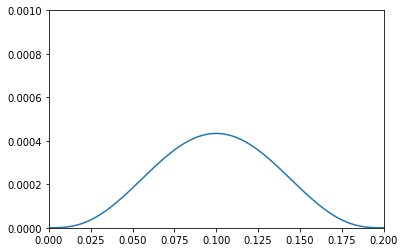

In [519]:
plt.plot(q2plot, old)
plt.xlim((0., d2))
plt.ylim((0., 0.001))

In [522]:
fun = sy.lambdify((t, dt), N2_prod[6])

F = fun(q2plot, d2)

In [324]:
coeff_prod = np.zeros(10)

k = 0

for i in range(4):
    for j in range(4 - i):

        
        coeff_prod[k + j] = coeff_old[i]*coeff_old[j + i]
        
    k += (4 - i)  

In [32]:
coeff_prod = np.zeros(10)
coeff_prod[4] = 1.

In [33]:
coeff_prod

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [35]:
coeff_new = res2.dot(coeff_prod)

(0.0, 1.0)

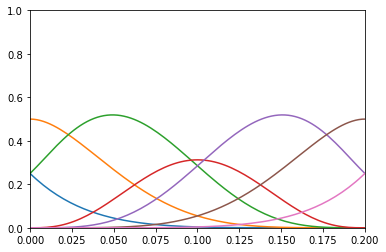

In [530]:
new = np.zeros(len(q2plot))

for i in range(7):
    
    new += coeff_new[i]*F[6 - i][i]
    
    plt.plot(q2plot, F[6 - i][i])
    
plt.xlim((0., d2))
plt.ylim((0., 1.))

(0.0, 0.001)

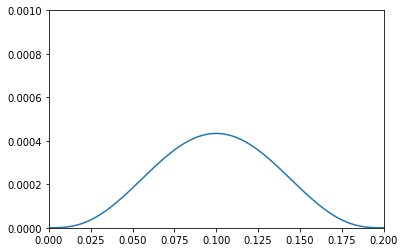

In [533]:
plt.plot(q2plot, new)
plt.xlim((0., d2))
plt.ylim((0., 0.001))

In [36]:
coeff_new

array([3.39234813e-18, 1.85037171e-18, 7.70988212e-19, 1.38888889e-03,
       0.00000000e+00, 0.00000000e+00, 1.38777878e-17])

In [238]:
coeff_new

array([0.42165685, 0.64276826, 0.64083432, 0.60057207, 0.57311948,
       0.48450746, 0.28407247])

In [508]:
res2[:,7]

array([ 1.44945784e-17,  6.47630098e-18, -1.54197642e-18,  5.55555556e-03,
        2.22222222e-02,  3.33333333e-02,  2.22222222e-02])

In [535]:
res2[3,:]

array([ 8.09537622e-18,  1.38888889e-03,  5.55555556e-03,  2.11111111e-01,
        1.38888889e-03,  2.73611111e-01,  2.11111111e-01,  5.55555556e-03,
        1.38888889e-03, -0.00000000e+00])

In [244]:
a = np.zeros((7, 10))

for i in range(7):
    for j in range(10):
        
        if res2[i, j] < 1e-10:
            a[i, j] = 0.
            
        else:
            a[i, j] = res2[i, j]

In [366]:
a[:,3]

array([0.        , 0.        , 0.        , 0.00138889, 0.        ,
       0.        , 0.        ])

In [512]:
1/0.00138

724.6376811594204